# 一元线性回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"]

In [2]:
x=tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

In [3]:
meanX=tf.reduce_mean(x)
meanY=tf.reduce_mean(y)
sumXY=tf.reduce_sum((x-meanX)*(y-meanY))
sumX=tf.reduce_sum((x-meanX)*(x-meanX))
w=sumXY/sumX
b=meanY-w*meanX

In [4]:
print("权值w=",w.numpy(),"\n偏置值b=",b.numpy())
print("线性模型：y=",w.numpy(),"*x+",b.numpy())

权值w= 0.8945604 
偏置值b= 5.4108505
线性模型：y= 0.8945604 *x+ 5.4108505


In [5]:
x_test=np.array([128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00])
y_pred=(w*x_test+b).numpy()

print("面积\t估计房价")
n=len(x_test)
for i in range(n):
    print(x_test[i],"\t",round(y_pred[i],3))

面积	估计房价
128.15 	 120.049
45.0 	 45.666
141.43 	 131.929
106.27 	 100.476
99.0 	 93.972
53.84 	 53.574
85.36 	 81.771
70.0 	 68.03


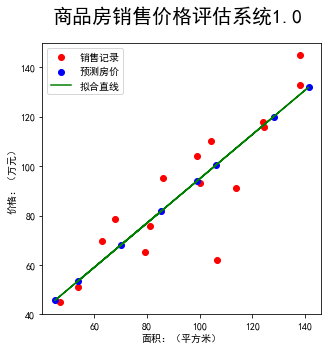

In [6]:
plt.figure(figsize=(5,5))

plt.scatter(x,y,color="red",label="销售记录")
plt.scatter(x_test,y_pred,color="blue",label="预测房价")
plt.plot(x_test,y_pred,color="green",label="拟合直线")

plt.xlabel("面积：（平方米）")
plt.ylabel("价格：（万元）")

#plt.xlim(40,150)#x坐标范围
#plt.ylim(40,150)

plt.suptitle("商品房销售价格评估系统1.0",fontsize=20)

plt.legend(loc="upper left")#样式格式位置
plt.show()

# 多元线性回归

In [7]:
x1=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
x2=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
x1.shape,x2.shape,y.shape

((16,), (16,), (16,))

In [8]:
#堆叠np.stack()
x0=np.ones(len(x1))
X=np.stack((x0,x1,x2),axis=1)
X

array([[  1.  , 137.97,   3.  ],
       [  1.  , 104.5 ,   2.  ],
       [  1.  , 100.  ,   2.  ],
       [  1.  , 124.32,   3.  ],
       [  1.  ,  79.2 ,   1.  ],
       [  1.  ,  99.  ,   2.  ],
       [  1.  , 124.  ,   3.  ],
       [  1.  , 114.  ,   2.  ],
       [  1.  , 106.69,   2.  ],
       [  1.  , 138.05,   3.  ],
       [  1.  ,  53.75,   1.  ],
       [  1.  ,  46.91,   1.  ],
       [  1.  ,  68.  ,   1.  ],
       [  1.  ,  63.02,   1.  ],
       [  1.  ,  81.26,   2.  ],
       [  1.  ,  86.21,   2.  ]])

In [9]:
Y=np.array(y).reshape(-1,1)
Y

array([[145.  ],
       [110.  ],
       [ 93.  ],
       [116.  ],
       [ 65.32],
       [104.  ],
       [118.  ],
       [ 91.  ],
       [ 62.  ],
       [133.  ],
       [ 51.  ],
       [ 45.  ],
       [ 78.5 ],
       [ 69.65],
       [ 75.69],
       [ 95.3 ]])

In [10]:
#矩阵转置np.transpose()   .T
#矩阵求逆np.linalg.inv()  .mat().I
#求矩阵相乘np.matmul()    @

W=(np.linalg.inv(X.T@X))@X.T@Y
W

array([[11.96729093],
       [ 0.53488599],
       [14.33150378]])

In [11]:
W=W.reshape(-1)
W

array([11.96729093,  0.53488599, 14.33150378])

In [12]:
print("多元线性回归")
print("Y=",W[1],"*x1+",W[2],"*x2+",W[0])

多元线性回归
Y= 0.5348859949724512 *x1+ 14.331503777673632 *x2+ 11.967290930536517


In [13]:
print("由房间面积、房间数->预估房价")
print("请输入房间面积和房间数")
x1_test=eval(input("商品房面积："))
x2_test=eval(input("房间数："))


y_pred=W[1]*x1_test+W[2]*x2_test+W[0]
print("预测价格：",round(y_pred,2),"万元")

由房间面积、房间数->预估房价
请输入房间面积和房间数
商品房面积：1
房间数：1
预测价格： 26.83 万元


# 三维数据可视化

D:\anaconda3\envs\tensorflow2-4\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


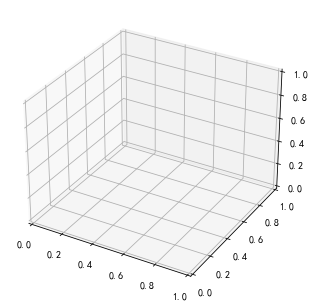

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax3d=Axes3D(fig)
plt.show()

D:\anaconda3\envs\tensorflow2-4\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys


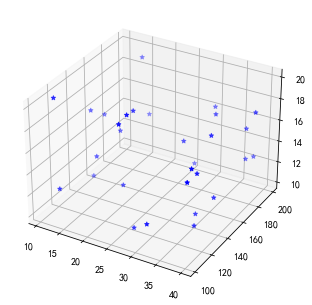

In [15]:
#随机点
x=np.random.uniform(10,40,30)
y=np.random.uniform(100,200,30)
z=np.random.uniform(10,20,30)

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.scatter(x,y,z,color="b",marker="*")
plt.show()

In [ ]:
#z=2x+y
x=np.random.uniform(10,40,300000)
y=np.random.uniform(100,200,300000)
z=2*x+y

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.scatter(x,y,z,color="b",marker="*")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z=2X+Y")

plt.show()

D:\anaconda3\envs\tensorflow2-4\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys


In [ ]:
#生成网格点坐标矩阵
#np.meshgrid()
x=[1,2,3,4]
y=[4,5,6]
X,Y=np.meshgrid(x,y)
X,Y

In [ ]:
#np中看形状直接.shape  ps:无括号
x=np.arange(1,5)
y=np.arange(1,5)
X,Y=np.meshgrid(x,y)
X.shape,Y.shape

In [ ]:
Z=2*X+Y
Z.shape

In [ ]:
#绘制平面曲面图
#plot_surface()
fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_surface(X,Y,Z,cmap="rainbow")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z=2X+Y")

plt.show()

In [ ]:
x=np.arange(0,100)
y=np.arange(0,100)
X,Y=np.meshgrid(x,y)
Z=2*X+Y

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_surface(X,Y,Z,cmap="rainbow")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z=2X+Y")

plt.show()

In [ ]:
#绘制框线图
#plot_wireframe()
x=np.arange(0,10,0.5)
y=np.arange(0,10,0.5)
X,Y=np.meshgrid(x,y)
Z=2*X+Y

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_wireframe(X,Y,Z,color="m",linewidth=0.5)

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z=2X+Y")

plt.show()

应用

In [ ]:
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)
X,Y=np.meshgrid(x,y)
Z=np.sin(np.sqrt(X**2+Y**2))

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_surface(X,Y,Z,cmap="rainbow")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.show()

In [ ]:
fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_wireframe(X,Y,Z,color="m",linewidth=0.5)

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.show()

# 线性回归模型可视化


In [ ]:
#加载数据
x1=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
x2=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
W=np.array([11.96729093,0.53488599,14.33150378])
y_pred=W[1]*x1+W[2]*x2+W[0]

In [ ]:
#绘制散点图
fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.scatter(x1,x2,y,color="b",marker="*")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_yticks([1,2,3])#设置Y的坐标值
ax3d.set_zlim3d(30,160)#设置Z的坐标范围
plt.show()

In [ ]:
#改变视角-90
fig=plt.figure()
ax3d=Axes3D(fig)
ax3d.view_init(elev=0,azim=-90)

ax3d.scatter(x1,x2,y,color="b",marker="*")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_yticks([1,2,3])#设置Y的坐标值
ax3d.set_zlim3d(30,160)#设置Z的坐标范围
plt.show()

In [ ]:
#改变视角0
fig=plt.figure()
ax3d=Axes3D(fig)
ax3d.view_init(elev=0,azim=0)

ax3d.scatter(x1,x2,y,color="b",marker="*")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_yticks([1,2,3])#设置Y的坐标值
ax3d.set_zlim3d(30,160)#设置Z的坐标范围
plt.show()

In [ ]:
#绘制平面图
X1,X2=np.meshgrid(x1,x2)
Y_PRED=W[1]*X1+W[2]*X2+W[0]

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.plot_surface(X1,X2,Y_PRED,cmap="rainbow")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_yticks([1,2,3])#设置Y的坐标值
ax3d.set_zlim3d(30,160)#设置Z的坐标范围
plt.show()

In [ ]:
#绘制散点图和线框图
plt.rcParams["font.sans-serif"]=["SimHei"]

fig=plt.figure()
ax3d=Axes3D(fig)

ax3d.scatter(x1,x2,y,color="b",marker="*",label="销售记录")
ax3d.scatter(x1,x2,y_pred,color="r",label="预测房价")
ax3d.plot_wireframe(X1,X2,Y_PRED,color="m",linewidth=0.5,label="拟合平面")

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_yticks([1,2,3])#设置Y的坐标值
ax3d.set_zlim3d(30,160)#设置Z的坐标范围

plt.title("商品房销售回归模型",fontsize=20)
plt.legend(loc="upper left")
plt.show()